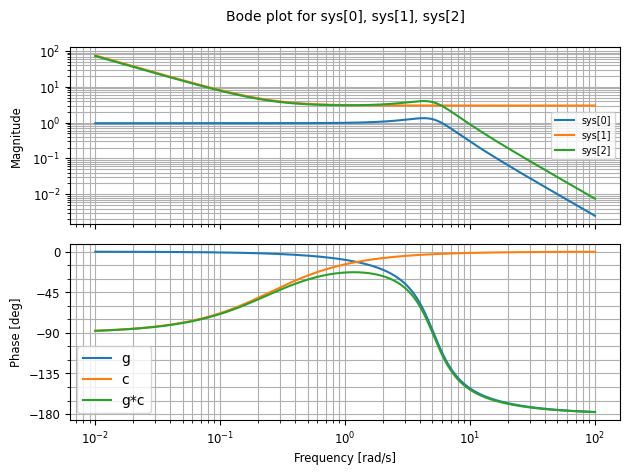

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ct

g=ct.tf([25],[1, 4, 26])
c=ct.tf([12, 3],[4, 0])
ct.bode_plot([g,c,g*c])
plt.legend(["g","c","g*c"])
plt.show()

[]

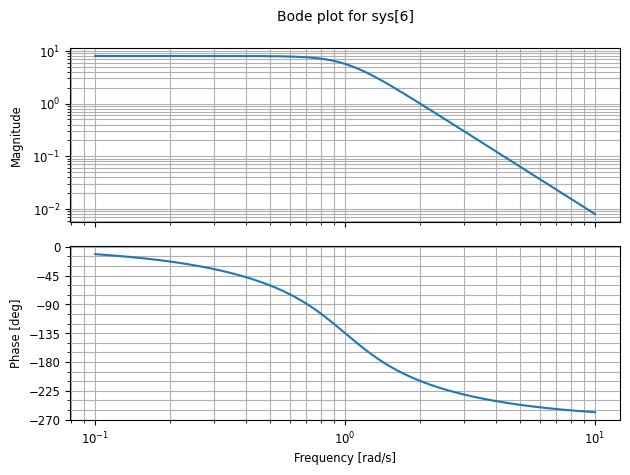

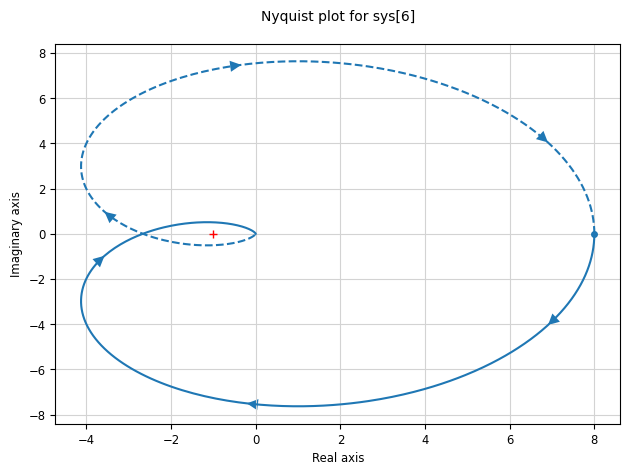

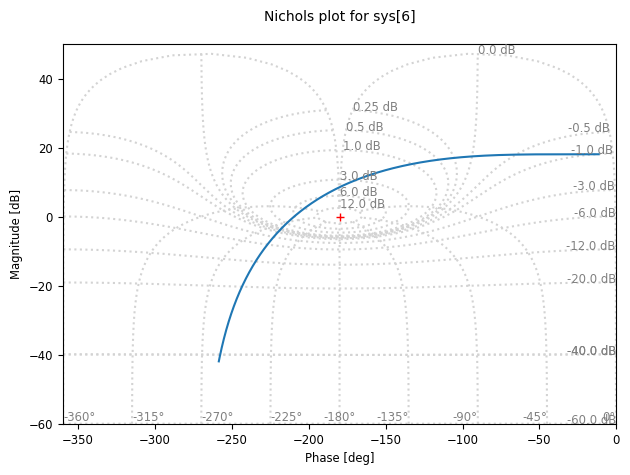

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import control as ct

sys = ct.tf([8], [1, 2, 2, 1])
ct.bode_plot([sys])
plt.figure()
ct.nyquist_plot([sys])
plt.figure()
ct.nichols_plot([sys])
plt.plot()

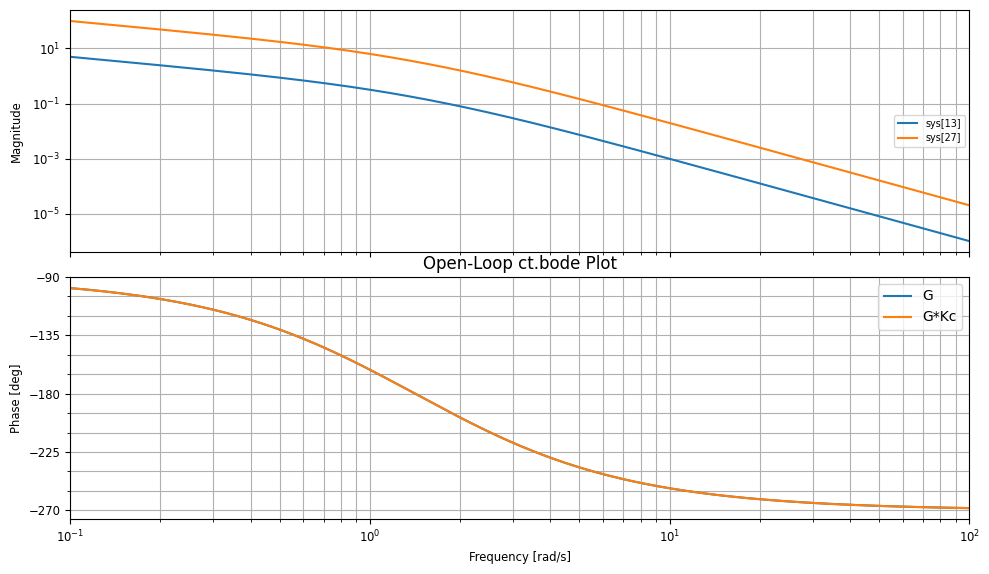

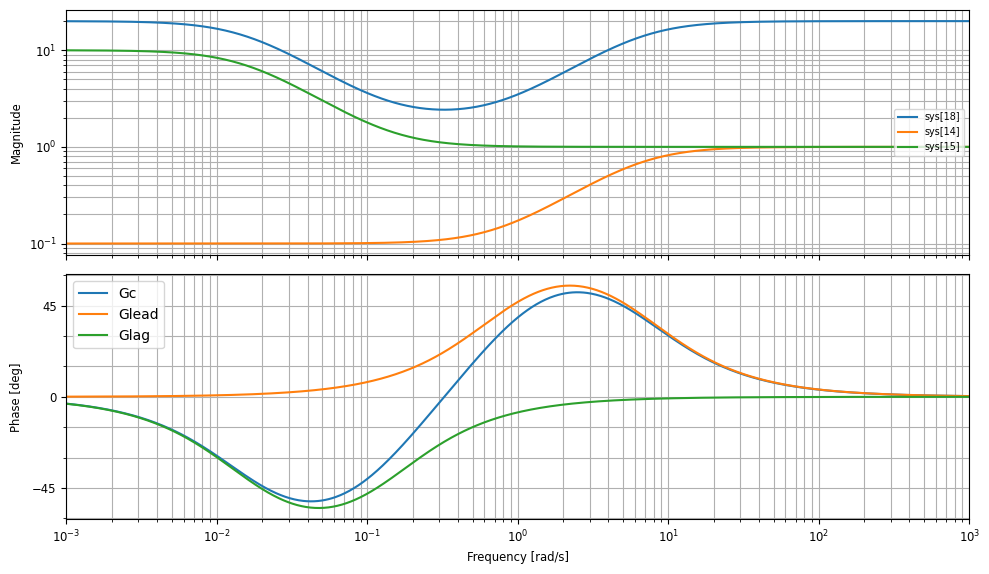

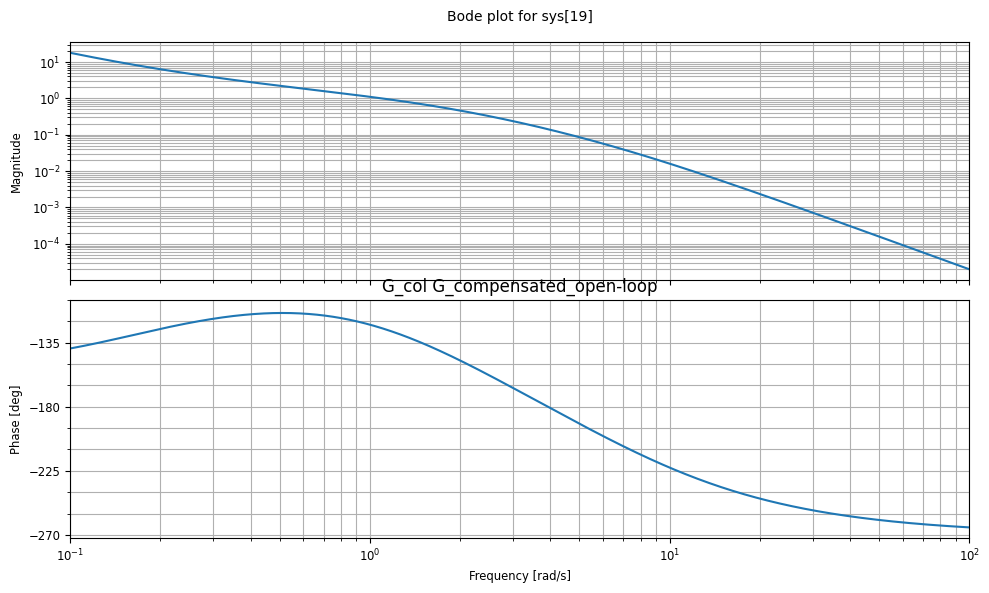

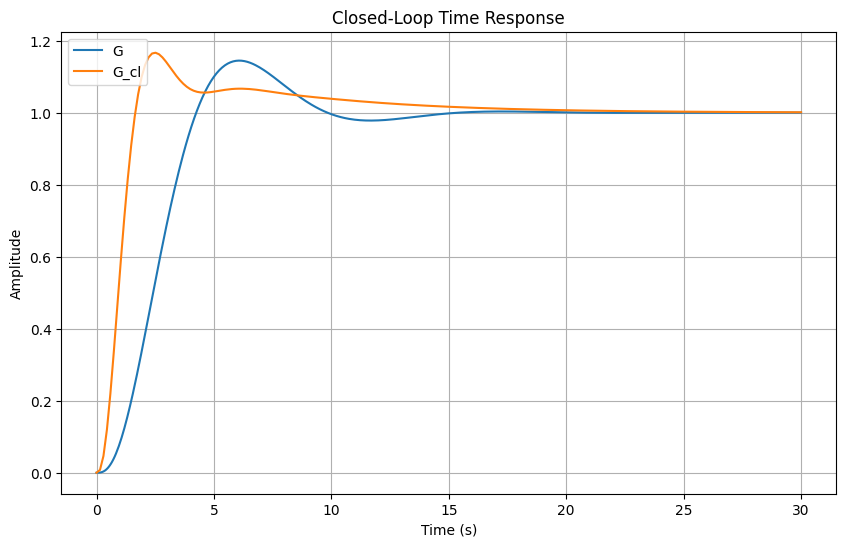

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Define the plant transfer function
G = ct.tf([1], [1, 3, 2, 0])

# Define the lead compensator transfer function
T_lead = 1/0.7
a = 10
G_lead = ct.tf([1, 1/T_lead], [1, a/T_lead])

# Define the lag compensator transfer function
T_lag = 1/0.15
b = a
G_lag = ct.tf([1, 1/T_lag], [1, 1/b/T_lag])

# Define the lead-lag compensator transfer function
Kc = 20
G_comp = Kc * G_lead * G_lag

# Define the closed-loop transfer function
G_col = G * G_comp
G_cl = G * G_comp / (1 + G * G_comp)

# ct.bode plot of the open-loop transfer function
plt.figure(figsize=(10, 6))
ct.bode(G, omega_limits=[0.1, 100])
ct.bode(G*Kc, omega_limits=[0.1, 100])
plt.legend(['G', 'G*Kc'], loc='upper right')
plt.title('Open-Loop ct.bode Plot')
plt.show()

# ct.bode plot of the lead-lag compensator
plt.figure(figsize=(10, 6))
ct.bode(G_comp, omega_limits=[10**-3, 10**3])
ct.bode(G_lead, omega_limits=[10**-3, 10**3], wrap_phase=True)
ct.bode(G_lag, omega_limits=[10**-3, 10**3])
plt.legend(['Gc', 'Glead', 'Glag'], loc='upper left')
plt.show()

# ct.bode plot of the closed-loop transfer function
plt.figure(figsize=(10, 6))
ct.bode(G_col, omega_limits=[0.1, 100])
plt.title('G_col G_compensated_open-loop')
plt.show()

# Time response of the closed-loop system
plt.figure(figsize=(10, 6))
t, y = ct.step_response(ct.feedback(G, 1), T=30)
plt.plot(t, y)
# t, y = ct.step_response(ct.feedback(G*Kc, 1), T=30)
# plt.plot(t, y)
t, y = ct.step_response(G_cl, T=30)
plt.plot(t, y)
plt.title('Closed-Loop Time Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['G', 'G_cl'], loc='upper left')
plt.grid()
plt.show()

In [5]:
#Find margins
gm, pm, wg, wp = ct.margin(G)
print('G','\n', 'Gm =', gm, 'Pm =', pm, 'Wg =', wg, 'deg','Wp =', wp)
gm, pm, wg, wp = ct.margin(G*Kc)
print('G*Kc','\n','Gm =', gm, 'Pm =', pm, 'Wg =', wg, 'deg','Wp =', wp)
gm, pm, wg, wp = ct.margin(G_col)
print('G_col','\n','Gm =', gm, 'Pm =', pm, 'Wg =', wg, 'deg','Wp =', wp)


G 
 Gm = 5.999999999999999 Pm = 53.41078617769918 Wg = 1.414213562373095 deg Wp = 0.4457479596318945
G*Kc 
 Gm = 0.29999999999999993 Pm = -28.081409690127373 Wg = 1.414213562373095 deg Wp = 2.425255512440557
G_col 
 Gm = 7.024320907135137 Pm = 55.20700101575454 Wg = 3.9197047830274654 deg Wp = 1.095014913679428
